# 1) Data Preprocessing

In [20]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [22]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Text Classification with RNN/spam.csv', encoding='ISO-8859-1')

In [23]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
df.shape

(5572, 5)

In [25]:
# drop unecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [26]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.columns = ['labels', 'data']

In [28]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
# New column wit labels in binary
df['bin_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
y = df['bin_labels'].values

In [30]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df['data'], y, test_size=0.33) # 33% for test

## Converte sentences to sequences

In [32]:
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)

In [33]:
tokenizer

In [34]:
tokenizer.fit_on_texts(x_train)

In [35]:
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [36]:
x_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [37]:
sequences_train[0]

[28,
 8,
 652,
 21,
 88,
 76,
 30,
 8,
 105,
 1471,
 145,
 113,
 397,
 150,
 10,
 4,
 16,
 45,
 117,
 92,
 269]

In [38]:
len(sequences_train[0])

21

In [39]:
len(sequences_train[1])

26

## Finding the vocabulary

In [40]:
# Check number of words in vocabulary
word2idx = tokenizer.word_index
V = len(word2idx)
print("Total number of unique tokens are: %s" % V)

Total number of unique tokens are: 7310


Fix the **len** to be all equal so the neural network can accepte as a input

In [41]:
# pad sequences (to get N x T matrix)
# N: number of samples 
# T: number of time steps
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)


Shape of data train tensor: (3733, 189)


In [42]:
data_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [43]:
sequences_train[0]

[28,
 8,
 652,
 21,
 88,
 76,
 30,
 8,
 105,
 1471,
 145,
 113,
 397,
 150,
 10,
 4,
 16,
 45,
 117,
 92,
 269]

In [44]:
len(data_train[0])

# All record now is a vector of 189 size

189

In [45]:
T = data_train.shape[1] # 189

In [46]:
# pad the test set
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


# 2) Building the Model

In [53]:
# Create the model

# Choose embedding dimensionality
D = 20  # this is a hyper paramter, we can choose any word vector size that we want

# hidden state vector size (dimensionality)
M = 15

# Input layer
i = Input(shape=(T,))  # input layer takes in sequneces of integers, so shape is T

# Embedding layer
x = Embedding(V + 1, D) (i)  # This takes in sequences of integers and returns sequences of word vectors
# output is an array of N * T * D size
# + 1 because first word_index starts from 1 and not 0

# LSTM layer
x = LSTM(M, return_sequences=True) (x) # True because it's not encoder decoder representation
x = GlobalMaxPooling1D() (x)

# Dense slayer
x = Dense(1, activation='sigmoid') (x) # Sigmoid because it's a binary classification problem (0 or 1)

# input and layers
model = Model(i, x)

Compile the model

In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train the model

In [55]:
r = model.fit(x=data_train, y=y_train, epochs=10, validation_data=(data_test, y_test))

Epoch 1/10
117/117 [==============================] - 10s 75ms/step - loss: 0.5475 - accuracy: 0.8664 - val_loss: 0.3918 - val_accuracy: 0.8662
Epoch 2/10
117/117 [==============================] - 8s 70ms/step - loss: 0.3858 - accuracy: 0.8678 - val_loss: 0.3582 - val_accuracy: 0.8662
Epoch 3/10
117/117 [==============================] - 8s 71ms/step - loss: 0.3299 - accuracy: 0.8593 - val_loss: 0.2117 - val_accuracy: 0.8749
Epoch 4/10
117/117 [==============================] - 8s 71ms/step - loss: 0.1615 - accuracy: 0.9454 - val_loss: 0.1237 - val_accuracy: 0.9810
Epoch 5/10
117/117 [==============================] - 8s 72ms/step - loss: 0.0704 - accuracy: 0.9914 - val_loss: 0.0855 - val_accuracy: 0.9848
Epoch 6/10
117/117 [==============================] - 8s 71ms/step - loss: 0.0360 - accuracy: 0.9959 - val_loss: 0.0714 - val_accuracy: 0.9837
Epoch 7/10
117/117 [==============================] - 8s 71ms/step - loss: 0.0216 - accuracy: 0.9987 - val_loss: 0.0700 - val_accuracy: 0.983

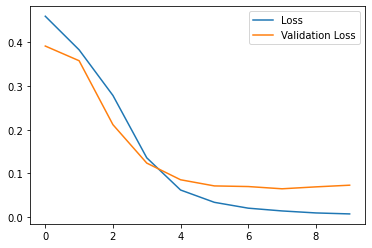

In [56]:
# Loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

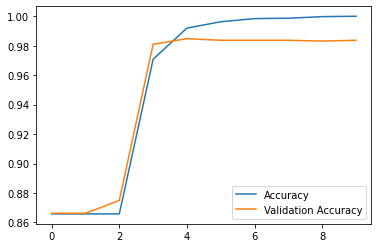

In [57]:
# Accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()